In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as mtick
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE

# A. Import Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/tele_x/TeleX-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# B. Clean and Transform Data

## 1. Check Data type

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Đưa các biến về đúng dạng dữ liệu theo ý nghĩa của chúng trong mô hình.

In [6]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('category')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

## 2. Missing Data

In [7]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Bộ dữ liệu chỉ có duy nhất 11 missing values trong trường TotalCharges. Vì số lượng missing values là khá ít, nên ta sẽ drop những rows chứa missing values

In [8]:
data.dropna(inplace = True)

## 3. Transform Data

Vì trường customerID không có giá trị thống kê, nên ta loại bỏ trường này khỏi mô hình.

In [9]:
data.drop(columns='customerID', inplace=True)

Chuyển biến Y label 'Churn' về dạng số để việc phân tích và xây dựng mô hình dễ dàng hơn.

In [10]:
data['Churn'] = data['Churn'].map({"No":0,"Yes":1})

Ta tiến hành biến đổi các biến rời rạc về dạng biến liên tục bằng cách get_dummies.

In [11]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

In [12]:
data_dummy = pd.get_dummies(data = data, columns = categorical_columns, drop_first =True)

In [13]:
data_dummy.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# C. EDA

## 1. Demographics

### Gender

Text(0.5, 0, 'Gender')

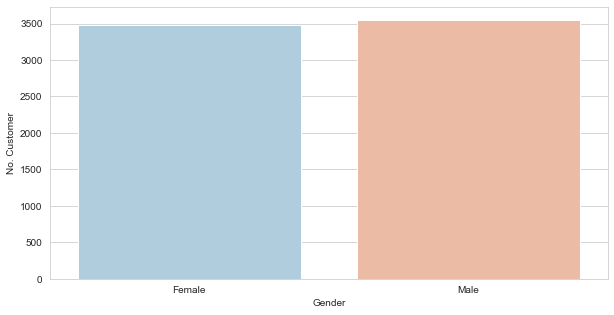

In [14]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
ax = sns.countplot(x='gender', data=data,palette='RdBu_r')
ax.set_ylabel('No. Customer')
ax.set_xlabel('Gender')

Trong bộ dữ liệu, số lượng khách hàng phân bổ đều giữa 2 nhóm giới tính Nam và Nữ.

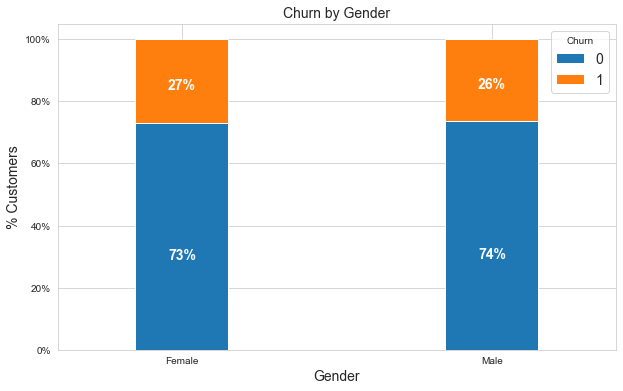

In [15]:
churn_gender = data.groupby(['gender','Churn']).size().unstack()

ax = (churn_gender.T*100.0 / churn_gender.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_title('Churn by Gender',size = 14)
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Gender',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.35*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Tỷ lệ Churn giữa 2 nhóm khách hàng Nam và Nữ gần như không có sự chênh lệnh.

Như vậy, ta chưa thể kết luận gì về ảnh hưởng của giới tính khách hàng tới khả năng Churn.

### Senior Citizen

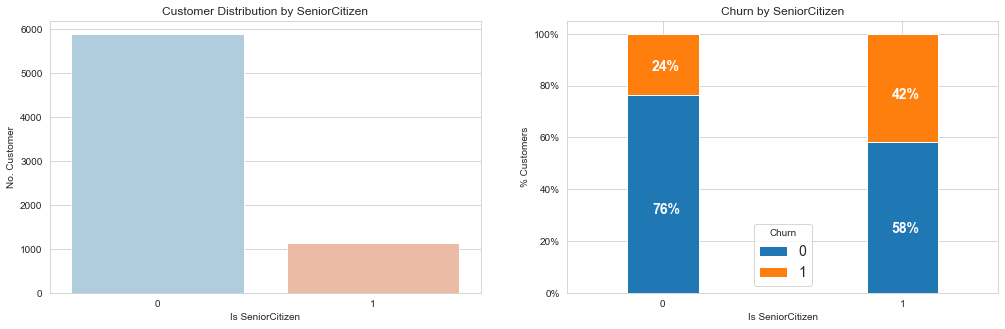

In [16]:
fig, (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2, figsize = (17, 5))

sns.set_style('whitegrid')
ax = sns.countplot(x='SeniorCitizen', data=data,palette='RdBu_r', ax=ax1)
ax.set_title('Customer Distribution by SeniorCitizen')
ax.set_ylabel('No. Customer')
ax.set_xlabel('Is SeniorCitizen')

churn_seniorcitizen = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (churn_seniorcitizen.T*100.0 / churn_seniorcitizen.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, 
                                                                  rot = 0, ax=ax2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_title('Churn by SeniorCitizen')
ax.set_ylabel('% Customers')
ax.set_xlabel('Is SeniorCitizen')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.35*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Mặc dù tập khách hàng người cao tuổi chỉ chiếm phần nhỏ trong tổng số khách hàng, nhưng nhóm khách hàng này lại có tỷ lệ churn cao hơn hẳn so với nhóm khách hàng còn lại (42% so với 24%).

Như vậy, có thể thấy rằng khả năng Churn bị ảnh hưởng bởi nhóm tuổi của khách hàng.

### Partner and Dependents

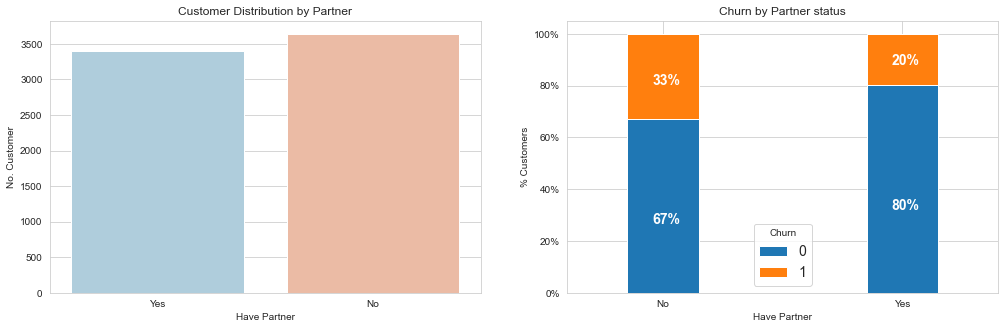

In [17]:
fig, (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2, figsize = (17, 5))

sns.set_style('whitegrid')
ax = sns.countplot(x='Partner', data=data,palette='RdBu_r', ax=ax1)
ax.set_title('Customer Distribution by Partner')
ax.set_ylabel('No. Customer')
ax.set_xlabel('Have Partner')

churn_partner = data.groupby(['Partner','Churn']).size().unstack()

ax = (churn_partner.T*100.0 / churn_partner.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, 
                                                                  rot = 0, ax=ax2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_title('Churn by Partner status')
ax.set_ylabel('% Customers')
ax.set_xlabel('Have Partner')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.35*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Khoảng 50% tổng số khách hàng đã có gia đình, và nhóm khách hàng này cũng có tỷ lệ Churn thấp hơn.

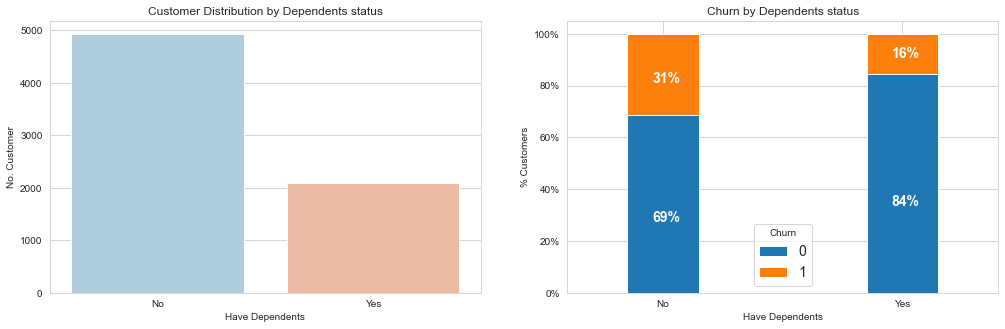

In [18]:
fig, (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2, figsize = (17, 5))

sns.set_style('whitegrid')
ax = sns.countplot(x='Dependents', data=data, palette='RdBu_r', ax=ax1)
ax.set_title('Customer Distribution by Dependents status')
ax.set_ylabel('No. Customer')
ax.set_xlabel('Have Dependents')

churn_dependents = data.groupby(['Dependents','Churn']).size().unstack()

ax = (churn_dependents.T*100.0 / churn_dependents.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, 
                                                                  rot = 0, ax=ax2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_title('Churn by Dependents status')
ax.set_ylabel('% Customers')
ax.set_xlabel('Have Dependents')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.35*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


Nhóm khách hàng đã có con chỉ chiếm khoảng 30% tổng số khách hàng, và nhóm khách hàng này cũng có tỷ lệ Churn thấp (chỉ bằng 1/2 nhóm khách hàng chưa có con).

## 2. Customer Information

### Tenure

<AxesSubplot:xlabel='tenure'>

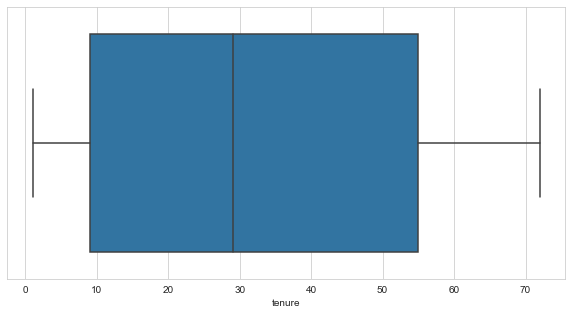

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x="tenure", data=data)

Trường "Tenure" không xuất hiện Outliers

Text(0.5, 1.0, 'Distribution of Churn Customer by Tenure')

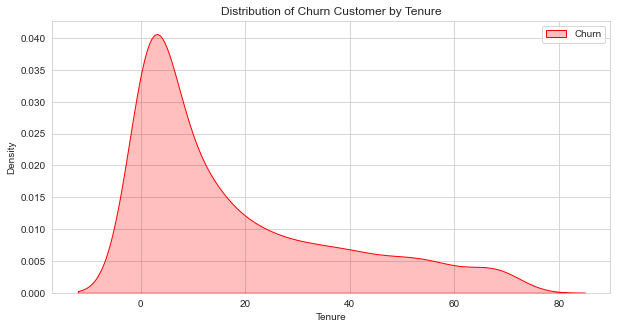

In [20]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(data.tenure[(data['Churn'] == 1) ], color='Red', shade= True)
ax.legend(["Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of Churn Customer by Tenure')

Các khách hàng càng có thời gian gắn bó lâu với doanh nghiệp, khả năng Churn càng thấp.

### Contract

Text(0.5, 0, 'Contract Type')

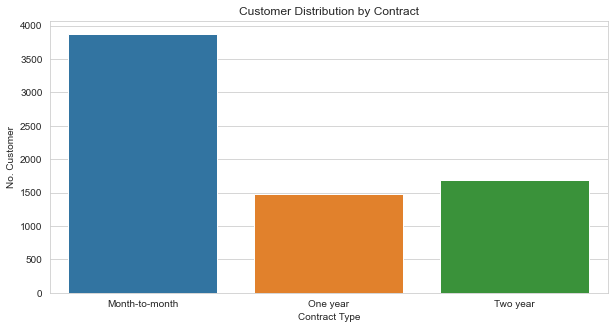

In [21]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
ax = sns.countplot(x='Contract', data=data)
ax.set_title('Customer Distribution by Contract')
ax.set_ylabel('No. Customer')
ax.set_xlabel('Contract Type')

Khoảng 50% khách hàng sử dụng loại hợp đồng ngắn hạn theo tháng. Số khách hàng còn lại phân bổ đều giữa 2 loại hợp đồng: trung hạn (1 năm) và dài hạn (2 năm).

C:\Users\minhd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two Year Contract')

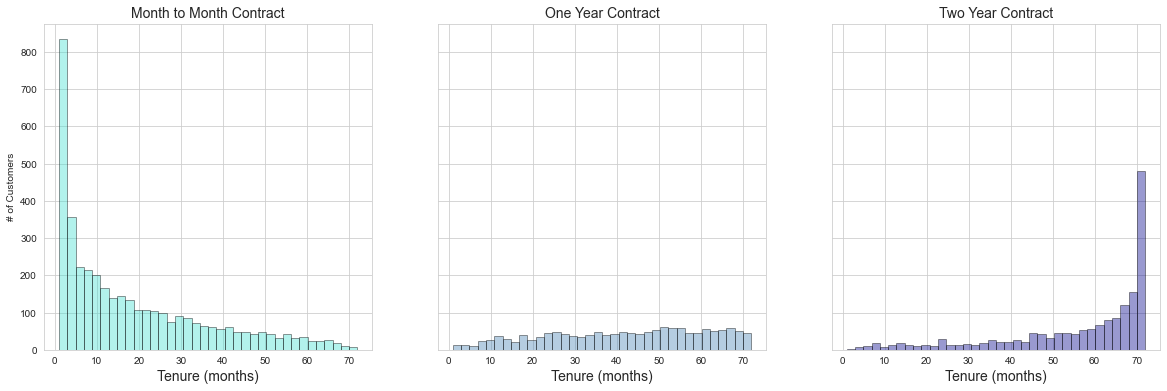

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)' ,size = 14)
ax.set_title('Month to Month Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Two Year Contract',size = 14)

Từ biểu đồ phân bố khách hàng theo từng loại hợp đồng, ta thấy rằng những khách hàng sử dụng loại hợp đồng ngắn hạn thì có thời gian gắn bó với doanh nghiệp ngắn, và ngược lại đối với những khách hàng sử dụng loại hợp đồng dài hạn (2 năm).

Kết hợp với sự tương quan giữa thời gian gắn bó với doanh nghiệp với khả năng Churn, có thể rút ra rằng khách hàng sử dụng các loại hợp đồng ngắn hạn sẽ có khả năng Churn cao hơn.

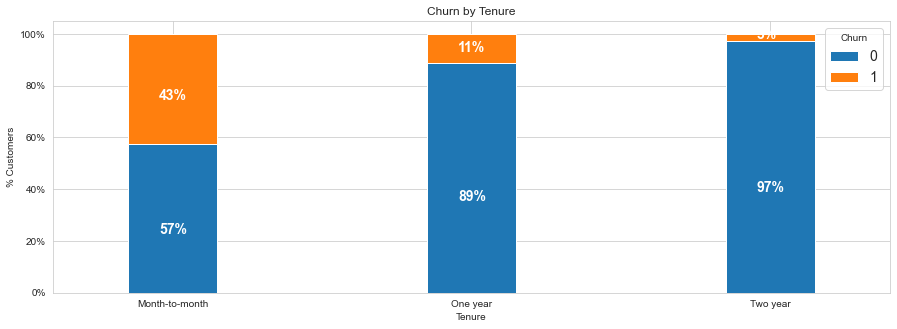

In [23]:
churn_contract = data.groupby(['Contract','Churn']).size().unstack()
ax = (churn_contract.T*100.0 / churn_contract.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (15, 5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_title('Churn by Tenure')
ax.set_ylabel('% Customers')
ax.set_xlabel('Tenure')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.35*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

### Services

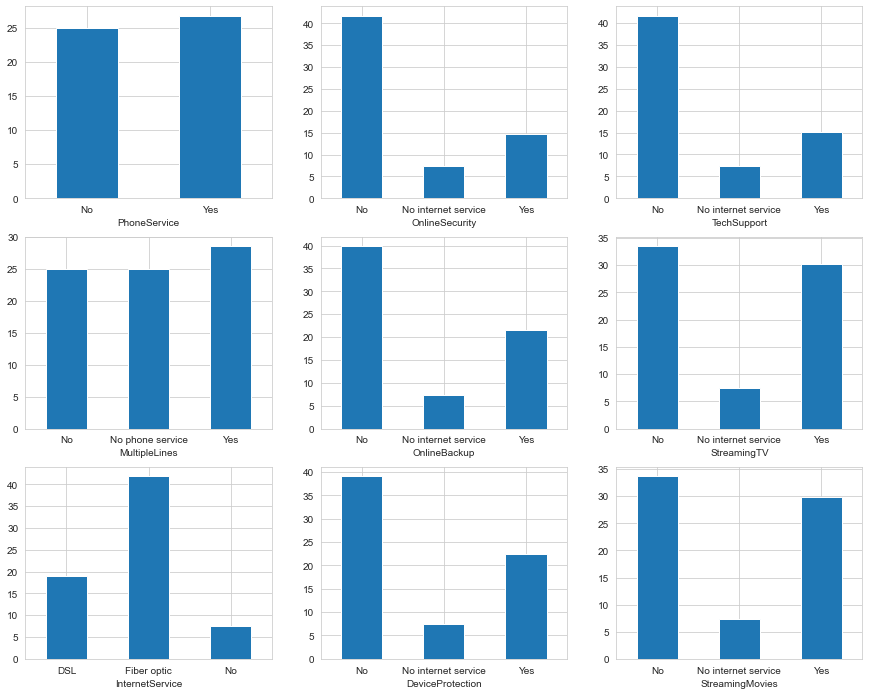

In [24]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3, figsize = (15,12))

for i, item in enumerate(services):
    churn_services = data.groupby([item,'Churn']).size().unstack()
    if i < 3:
        ax = (churn_services.T*100.0 / churn_services.T.sum()).iloc[1].T.plot(kind='bar',ax=axes[i,0],rot = 0)
               
    elif i >=3 and i < 6:
        ax = (churn_services.T*100.0 / churn_services.T.sum()).iloc[1].T.plot(kind='bar',ax=axes[i-3,1],rot = 0)
       
    elif i < 9:
        ax = (churn_services.T*100.0 / churn_services.T.sum()).iloc[1].T.plot(kind='bar',ax=axes[i-6,2],rot = 0)


Dựa vào biểu đồ tỷ lệ khách hàng Churn theo từng loại dịch vụ, ta nhận xét thấy rằng: 
<ul>
    <li>Tỷ lệ Churn của nhóm khách hàng 'Không' sử dụng dịch vụ OnlineSecurity, TechSupport, OnlineBackup và DeviceProtection có là rất cao (40%), hơn hẳn nhóm 'Có' sử dụng (15-20%)</li>
    <li>Tỷ lệ Churn giữa nhóm khách hàng 'Có' và 'Không' sử dụng các loại dịch vụ PhoneService, MultipleLines, StreamingTV và StreamingMovies không có nhiều khác biệt</li>
    <li>Tỷ lệ Churn của những khách hàng sử dụng loại dịch vụ InternetService là Fiber optic là rất cao (40%)</li>
    <li>Tỷ lệ Churn của những khách hàng 'Không' sử dụng dịch vụ Internet (No Internet Service) khá thấp (7%), trừ loại dịch vụ MultipleLines (25%)</li>
</ul>

### Monthly Charges

<AxesSubplot:xlabel='MonthlyCharges'>

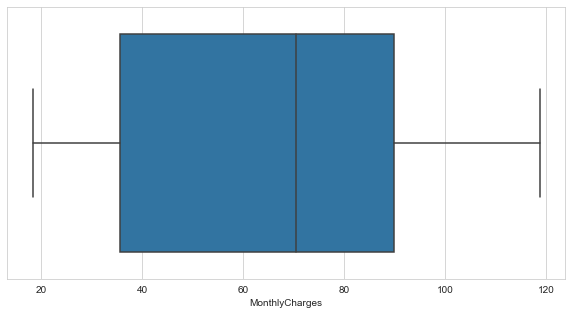

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x="MonthlyCharges", data=data)

Trường "MonthlyCharges" không xuất hiện Outliers

Text(0.5, 1.0, 'Distribution of Churn Customer by Monthly Charges')

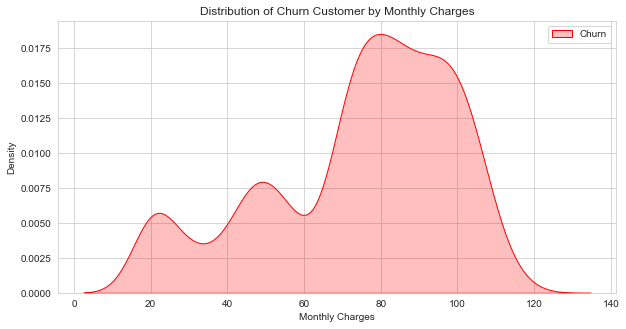

In [26]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(data.MonthlyCharges[(data['Churn'] == 1) ], color='Red', shade= True)
ax.legend(["Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Churn Customer by Monthly Charges')

Chi phí hằng tháng càng cao, số lượng khách hàng Churn càng cao.

In [27]:
pearson_coef, p_value = stats.pearsonr(data['MonthlyCharges'], data['Churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.19285821847008577  with a P-value of P = 6.760843117991897e-60


### Total Charges

<AxesSubplot:xlabel='TotalCharges'>

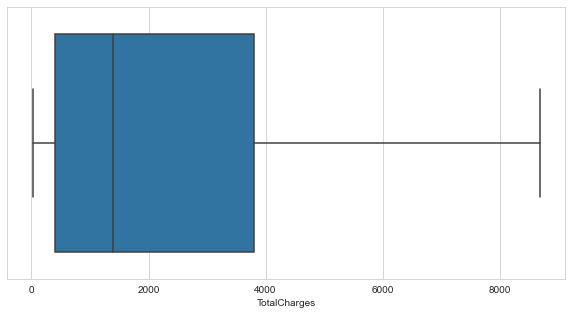

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x="TotalCharges", data=data)

Trường "TotalCharges" không xuất hiện Outliers

Text(0.5, 1.0, 'Distribution of Churn Customer by Total Charges')

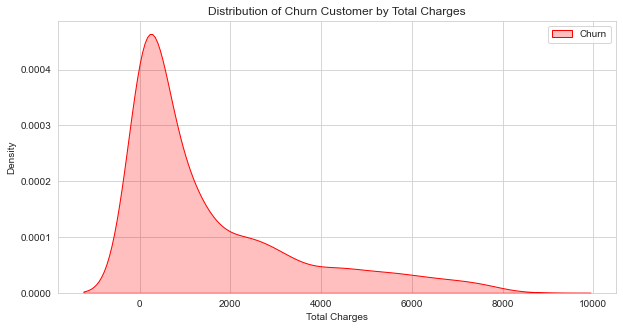

In [29]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(data.TotalCharges[(data['Churn'] == 1) ], color='Red', shade= True)
ax.legend(["Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Churn Customer by Total Charges')

Tổng chi phí càng cao, số lượng khách hàng Churn càng thấp.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

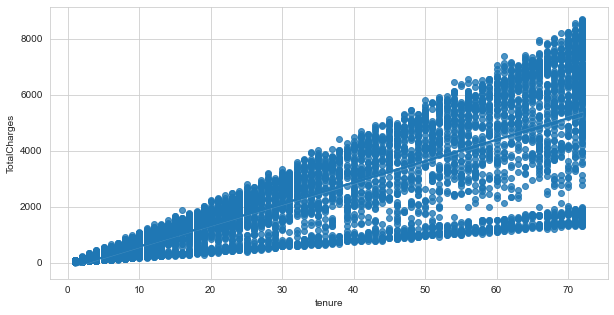

In [33]:
plt.figure(figsize=(10,5))
sns.regplot(x='tenure', y='TotalCharges', data=data)

Nhìn vào biểu đồ Simple Regression giữa biến 'tenure' và 'TotalCharges', ta có thể thấy chắc chắn rằng những khách hàng càng gắn bó lâu với doanh nghiệp thì có tổng chi phí càng lớn. Điều này chứng minh rằng những khách hàng có tổng chi phí dịch vụ lớn là những khách hàng trung thành và có khả năng Churn thấp.

In [30]:
pearson_coef, p_value = stats.pearsonr(data['TotalCharges'], data['Churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.1994840835675714  with a P-value of P = 4.8768656897028774e-64


## 3. Y label 'Churn'

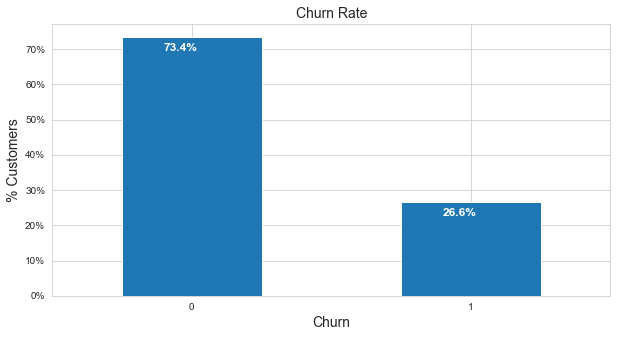

In [31]:
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar', rot = 0, figsize = (10,5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

73,4% không rời bỏ dịch vụ, có thể thấy rõ ràng rằng bộ dữ liệu này đang imbalance. Điều này có thể dẫn đến những sai lệch trong mô hình dự đoán sau này, nhất là trong việc dự đoán giá trị thiểu số. Tuy nhiên, điều này lại là tín hiệu tốt đối với hoạt động của doanh nghiệp bởi tỷ lệ khách hàng trung thành là cao.

## 4. Select Features

Sau khi đã khám phá và phân tích bộ dữ liệu, ta đã có những trường dữ liệu quan trọng để đưa vào mô hình.

Những trường dữ liệu có khả năng ảnh hưởng lớn tới kết quả dự đoán là:
<ul>
    <li>Thời gian khách hàng duy trì sử dụng dịch vụ</li>
    <li>Loại hợp đồng</li>
    <li>Khách hàng có sử dụng Online Security, Tech Support, Internet_fiber optic hay không</li>
    <li>Total Charges và Monthly Charges</li>
</ul>


In [30]:
data_dummy.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [31]:
data_dummy.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# D. Train Model

## 1. Split Train/Test set

In [37]:
X = data_dummy.drop(['Churn'], axis='columns')
y = data_dummy['Churn']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## 2. Resample Data

Ta tiến hành Oversample dữ liệu bằng SMOTE để đưa mẫu dữ liệu nhãn thiểu số và nhãn đa số về mức cân bằng (tạo ra các điểm dữ liệu nhãn thiểu số ảo).

In [39]:
X_train, y_train = SMOTE(k_neighbors=10).fit_resample(X_train, y_train)

## 3. Scale Data

Áp dụng MinMaxScaler để Normalize tất cả các trường dữ liệu về cùng miền giá trị [0; 1]

In [40]:
scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sc = MinMaxScaler()
X_train[scale_cols]= sc.fit_transform(X_train[scale_cols])
X_test[scale_cols] = sc.transform(X_test[scale_cols])

## 4. Train model

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_log = logmodel.predict(X_test)
print(classification_report(y_test, y_log))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1052
           1       0.56      0.66      0.61       355

    accuracy                           0.79      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.80      0.79      0.79      1407



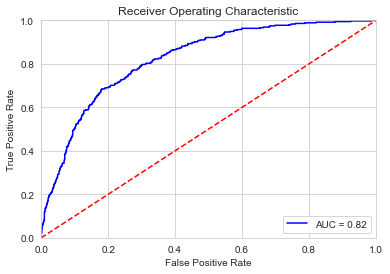

In [42]:
y_log_prob = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_log_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K-Nearest Neighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2, algorithm = 'brute')
clf_knn.fit(X_train, y_train)
y_knn = clf_knn.predict(X_test)
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1052
           1       0.48      0.67      0.56       355

    accuracy                           0.73      1407
   macro avg       0.67      0.71      0.68      1407
weighted avg       0.77      0.73      0.75      1407



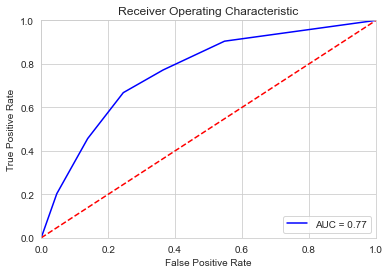

In [44]:
y_knn_prob = clf_knn.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_knn_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(max_depth =3, random_state = 42)
model_dtree.fit(X_train, y_train)
y_dtree = model_dtree.predict(X_test)
print(classification_report(y_test, y_dtree))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1052
           1       0.44      0.77      0.56       355

    accuracy                           0.70      1407
   macro avg       0.67      0.72      0.66      1407
weighted avg       0.78      0.70      0.71      1407



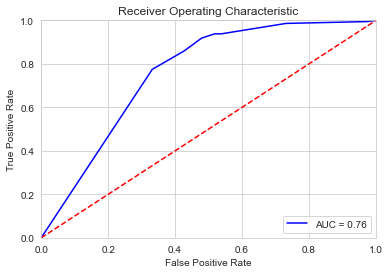

In [46]:
y_dtree_prob = model_dtree.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_dtree_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost

In [47]:
from xgboost import XGBClassifier
XGB = XGBClassifier(tree_method='gpu_hist',   predictor='gpu_predictor')
XGB.fit(X_train, y_train)
y_XG = XGB.predict(X_test)
print(classification_report(y_test, y_XG))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1052
           1       0.55      0.61      0.58       355

    accuracy                           0.78      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.78      0.78      1407



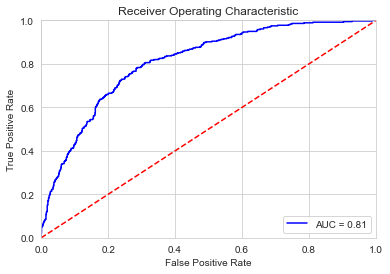

In [48]:
y_XGB_prob = XGB.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_XGB_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)
y_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_rf))

C:\Users\minhd\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1052
           1       0.54      0.68      0.61       355

    accuracy                           0.78      1407
   macro avg       0.71      0.75      0.73      1407
weighted avg       0.80      0.78      0.78      1407



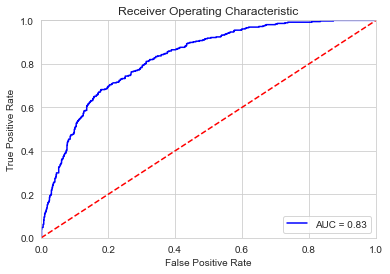

In [50]:
y_rf_prob = model_rf.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_rf_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5. Cross Validate and Develop Model

Ta tiến hành sử dụng GridSearchCV để tối ưu hóa các hyper parameters và kiểm tra lại mô hình bằng tính năng kiểm tra chéo Cross Validation.

### Logistic Regression

In [51]:
para_log = {'class_weight': (None, 'Balanced')}
grid_log_class = GridSearchCV(
        estimator = logmodel,
        param_grid = para_log,
        scoring='f1',
        n_jobs =4,
        cv = 10,
        refit=True,
        )
grid_log_class.fit(X_train, y_train)
y_rd_grid = grid_log_class.predict(X_test)
print(classification_report(y_test, y_rd_grid))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1052
           1       0.56      0.66      0.61       355

    accuracy                           0.79      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.80      0.79      0.79      1407



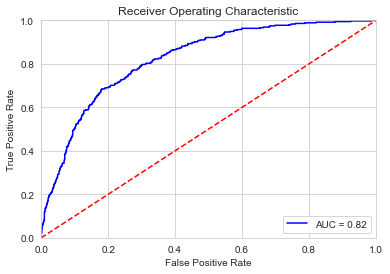

In [52]:
y_log_prob = grid_log_class.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_log_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K-Nearest Neighbors

In [53]:
para_knn = {'n_neighbors': (5, 10, 15, 20)}
grid_knn_class = GridSearchCV(
        estimator = clf_knn,
        param_grid = para_knn,
        scoring='f1',
        n_jobs =4,
        cv = 10,
        refit=True,
        )
grid_knn_class.fit(X_train, y_train)
y_rd_grid = grid_knn_class.predict(X_test)
print(classification_report(y_test, y_rd_grid))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1052
           1       0.50      0.71      0.58       355

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.79      0.74      0.76      1407



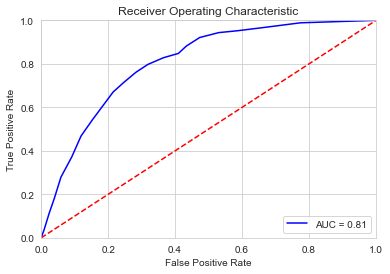

In [54]:
y_knn_prob = grid_knn_class.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_knn_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree

In [56]:
para_dct = {'max_features': ['auto', 'sqrt', 'log2']
            , 'max_depth': [2, 4, 6, 8]
            , 'criterion': ['gini', 'entropy']
            , 'class_weight': [None, 'balanced']}
grid_dct_class = GridSearchCV(
        estimator = model_dtree,
        param_grid = para_dct,
        scoring='f1',
        n_jobs =4,
        cv = 10,
        refit=True,
        )
grid_dct_class.fit(X_train, y_train)
y_dct_grid = grid_dct_class.predict(X_test)
print(classification_report(y_test, y_dct_grid))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1052
           1       0.47      0.64      0.54       355

    accuracy                           0.72      1407
   macro avg       0.66      0.70      0.67      1407
weighted avg       0.76      0.72      0.74      1407



C:\Users\minhd\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


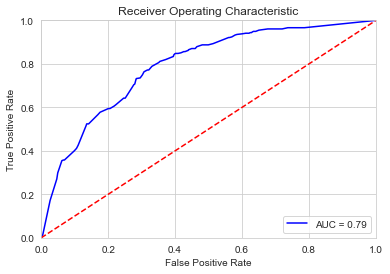

In [57]:
y_dtree_prob = grid_dct_class.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_dtree_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost

In [50]:
para_XG = {'eta': [0.05, 0.1, 0,2, 0.3]
           , 'max_depth': [4, 6, 8]
           , 'subsample': [0.6, 0.8, 1]}
grid_XG_class = GridSearchCV(
        estimator = XGB,
        param_grid = para_XG,
        scoring='f1',
        n_jobs =4,
        cv = 10,
        refit=True,
        )
grid_XG_class.fit(X_train, y_train)
y_XG_grid = grid_XG_class.predict(X_test)
print(classification_report(y_test, y_XG_grid))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1052
           1       0.53      0.56      0.55       355

    accuracy                           0.76      1407
   macro avg       0.69      0.70      0.69      1407
weighted avg       0.77      0.76      0.77      1407



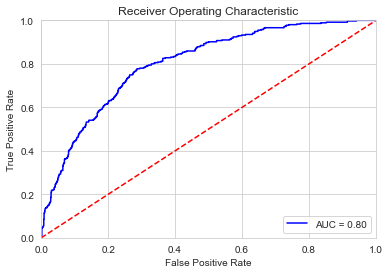

In [51]:
y_XG_prob = grid_XG_class.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_XG_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest

In [52]:
para_rf = {'n_estimators': [200, 500, 1000]
            , 'max_features': ['auto', 'sqrt', 'log2']
            , 'max_depth': [2, 4, 6, 8]
            , 'criterion': ['gini', 'entropy']
            , 'class_weight': [None, 'balanced']}
grid_rf_class = GridSearchCV(
        estimator = model_rf,
        param_grid = para_rf,
        scoring='f1',
        n_jobs =4,
        cv = 10,
        refit=True,
        )
grid_rf_class.fit(X_train, y_train)
y_rd_grid = grid_rf_class.predict(X_test)
print(classification_report(y_test, y_rd_grid))

C:\Users\minhd\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1052
           1       0.50      0.73      0.59       355

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



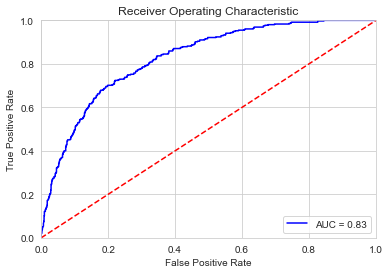

In [53]:
y_rf_prob = grid_rf_class.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_rf_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
print(grid_rf_class.best_params_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}


### Ta cũng có thể tìm được những Features quan trọng dựa vào thuật toán Random Forest Classification.

In [55]:
importances = model_rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

<BarContainer object of 30 artists>

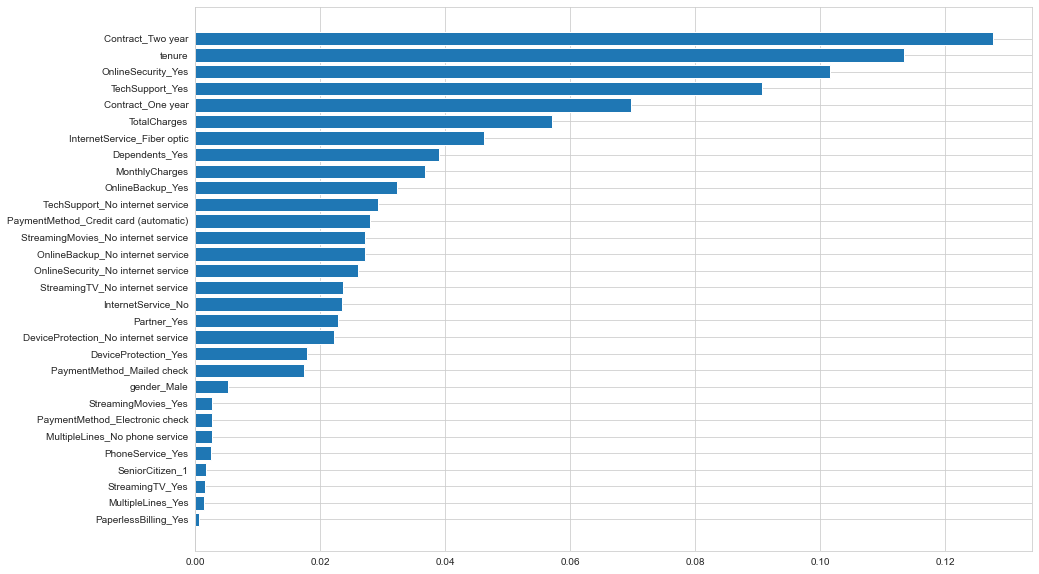

In [56]:
plt.figure(figsize=(15,10))
sorted_idx = model_rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], model_rf.feature_importances_[sorted_idx])

Thuật toán Random Forest đã cho ra tầm quan trọng của những trường dữ liệu khi đưa vào mô hình, và đúng như những gì đã phân tích trong phần EDA, các đầu vào quan trọng nhất để dự đoán khách hàng Churn là:
<ul>
    <li>Tenure</li>
    <li>Contract</li>
    <li>Online Security</li>
    <li>Tech Support</li>
    <li>Total Charges</li>
</ul>

## 6. Conclusion

Đối với bài toán Classification 2 giá trị, đặc biệt là khi bộ dữ liệu bị mất cân bằng (giá trị đích 'churn' chiếm thiểu số), ta đánh giá mô hình dựa trên các metrics ưu tiên là: Recall, F1score và AUC ROC.

Recall được ưu tiên hơn Precision, bởi ta mong muốn tìm được các điểm giá trị Positive thực tế nhiều nhất có thể để có thể đề ra các biện pháp xử lý kịp thời nhằm giữ chân khách hàng, và hạn chế các điểm False Negative (khách hàng churn nhưng lại dự đoán là không churn). 

F1 được sử dụng để cân bằng Recall và Precision.

Mô hình tốt nhất là Random Forest với các metrics:
<ul>
    <li>Reacall = 0.73</li>
    <li>F1 score = 0.60</li>
    <li>AUC = 0.83</li>
    <li>Accuracy = 0.76</li>
</ul>